In [58]:
prov_stats <- read.csv('data/snic-provincias.csv')
subset_murder <- subset(prov_stats, anio == 2022 & codigo_delito_snic_nombre == 'Homicidios dolosos')
murder_rate = subset_murder[['tasa_victimas']]

### Estimates of location

In [59]:
mean(murder_rate)

mean(murder_rate, trim=0.1)

median(murder_rate)

[1] 3.646806

[1] 3.394248

[1] 3.235422

In [60]:
weighted.mean(subset_murder[['cantidad_victimas']], murder_rate)

[1] 122.2258

### Estimates of variability

In [61]:
sd(murder_rate)

IQR(murder_rate)

mad(murder_rate)

[1] 2.070333

[1] 1.910242

[1] 1.38745

### Data distributions

In [62]:
quantile(murder_rate, p=c(.05, .25, .5, .75, .95))

5%      25%      50%      75%      95% 
1.582775 2.376682 3.235422 4.286923 5.613088

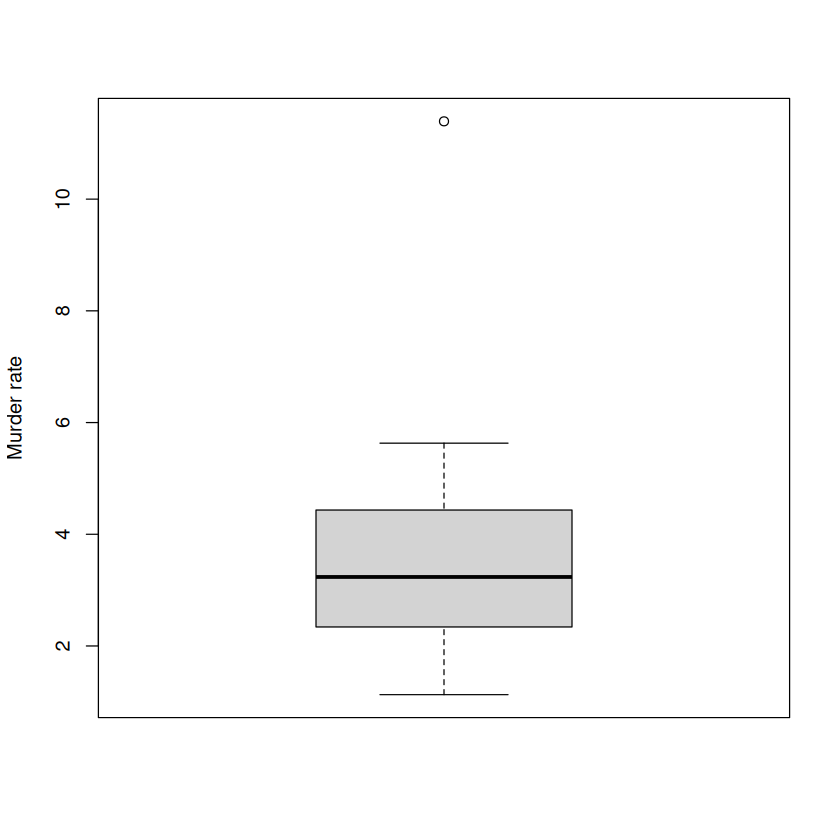

In [63]:
boxplot(murder_rate, ylab='Murder rate')

In [64]:
bins_seq <- seq(from = min(murder_rate), to = max(murder_rate), length = 15)
murder_freq <- cut(murder_rate, breaks = bins_seq, right = TRUE, include.lowest = TRUE)
table(murder_freq)


murder_freq
[1.13,1.86] (1.86,2.59] (2.59,3.33] (3.33,4.06] (4.06,4.79] (4.79,5.53] 
          2           6           4           5           2           3 
(5.53,6.26] (6.26,6.99] (6.99,7.73] (7.73,8.46] (8.46,9.19] (9.19,9.93] 
          1           0           0           0           0           0 
(9.93,10.7] (10.7,11.4] 
          0           1 

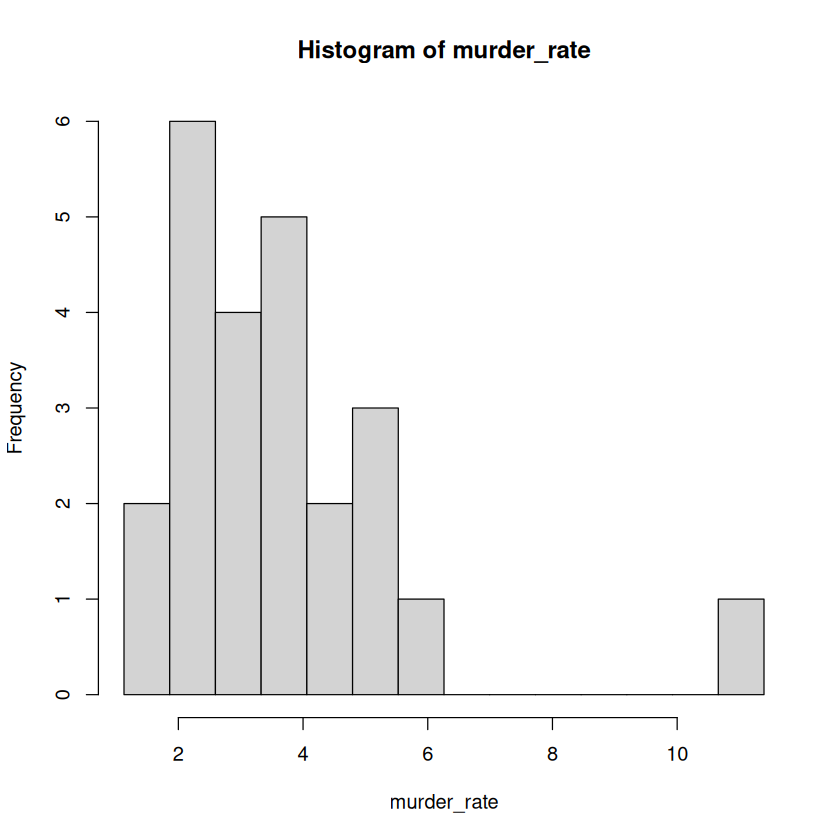

In [65]:
hist(murder_rate, breaks = bins_seq)

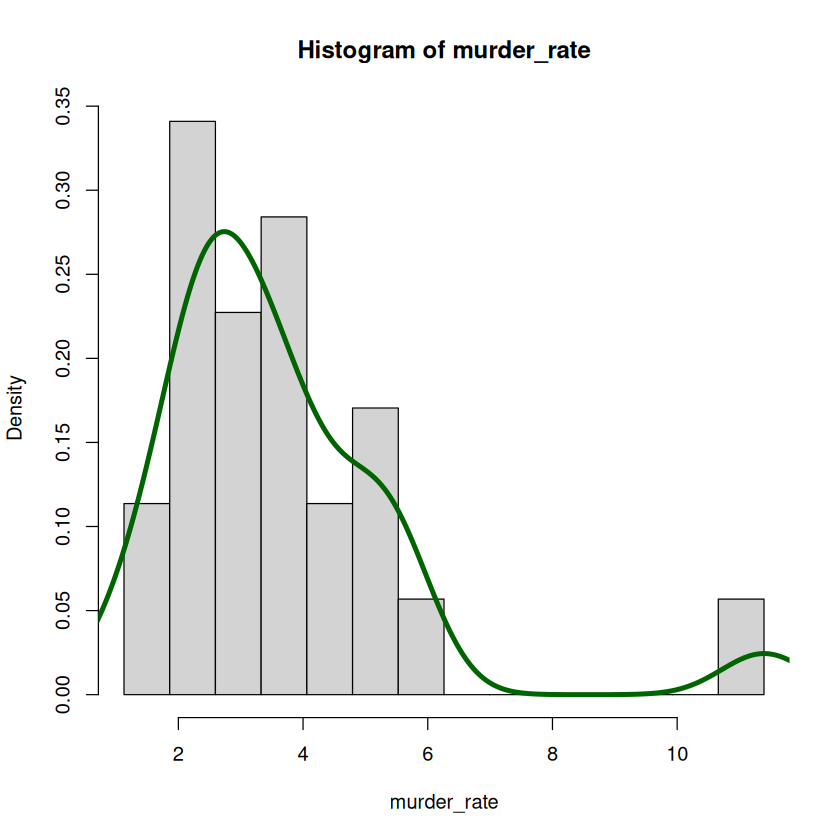

In [66]:
hist(murder_rate, breaks = bins_seq, freq = FALSE)
lines(density(murder_rate), lwd=4, col='darkgreen')

### Binary and categorical data

In [73]:
subset_murder <- subset(prov_stats, anio == 2022 & 
                        grepl("^Delitos", codigo_delito_snic_nombre) &
                        provincia_nombre == 'Ciudad Autónoma de Buenos Aires')
print(cbind(subset_murder$codigo_delito_snic_id, subset_murder$codigo_delito_snic_nombre))

      [,1]   [,2]                                                           
 [1,] "9"    "Delitos contra el honor"                                      
 [2,] "12"   "Delitos contra el estado civil"                               
 [3,] "22"   "Delitos contra la seguridad pública"                          
 [4,] "23"   "Delitos contra el orden público"                              
 [5,] "24"   "Delitos contra la seguridad de la nación"                     
 [6,] "25"   "Delitos contra los poderes públicos y el orden constitucional"
 [7,] "26"   "Delitos contra la administración pública"                     
 [8,] "27"   "Delitos contra la fe pública"                                 
 [9,] "29_3" "Delitos migratorios"                                          
[10,] "32"   "Delitos contra el orden económico y financiero"               


In [109]:
# Probabilities and Expected Value

probs <- round(subset_murder[['cantidad_hechos']]/sum(subset_murder[['cantidad_hechos']]), 5)
probs <- cbind(subset_murder$codigo_delito_snic_id, probs)
colnames(probs) <- c("codigo_delito_snic_id", "probabilities")
probs <- as.data.frame(probs)
print(probs)

ev <- sum(as.numeric(probs$probabilities) * as.numeric(subset_murder$cantidad_hechos))
print(ev)




   codigo_delito_snic_id probabilities
1                      9       0.01161
2                     12       0.00029
3                     22       0.19826
4                     23       0.03687
5                     24       0.00058
6                     25       0.00058
7                     26       0.55617
8                     27       0.18258
9                   29_3       0.00029
10                    32       0.01277
[1] 1321.588


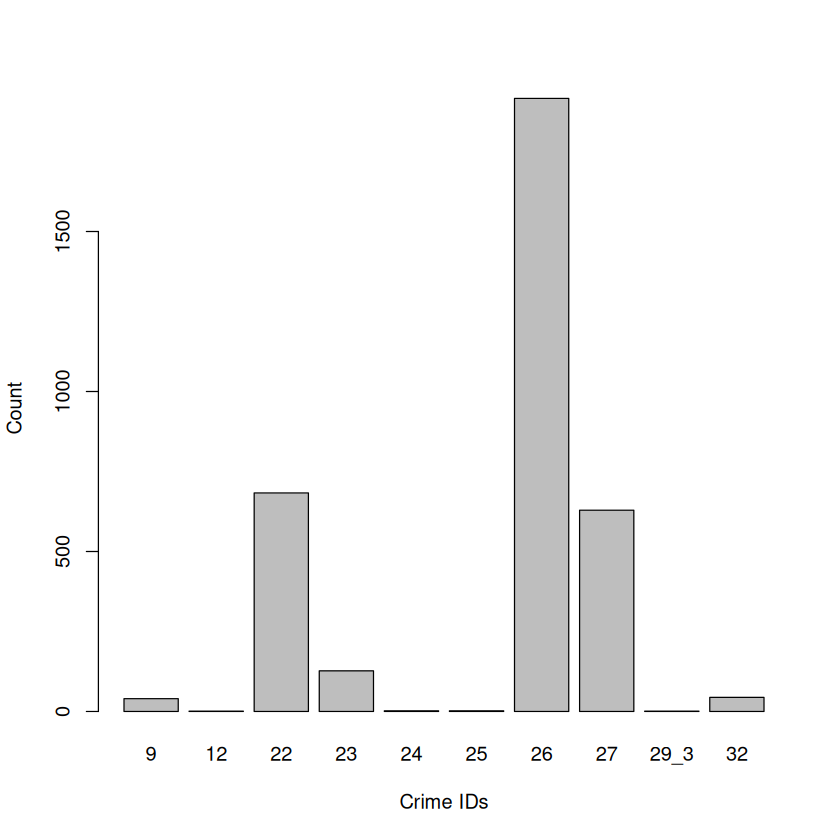

In [77]:
barplot(subset_murder$cantidad_hechos, names.arg = subset_murder$codigo_delito_snic_id,
        xlab = 'Crime IDs', ylab = 'Count')

### Correlation

In [119]:
sp500_px <- read.csv('data/sp500_data.csv')
sp500_sym <- read.csv('data/sp500_sectors.csv')

telecom <- sp500_px[row.names(sp500_px) > '2012-07-01', sp500_sym[sp500_sym$sector == 'telecommunications_services', 'symbol']]

# Telecommunication stocks correlations
print(round(cor(telecom), 3))



         T   CTL   FTR    VZ  LVLT
T    1.000 0.455 0.359 0.681 0.082
CTL  0.455 1.000 0.435 0.448 0.096
FTR  0.359 0.435 1.000 0.349 0.111
VZ   0.681 0.448 0.349 1.000 0.096
LVLT 0.082 0.096 0.111 0.096 1.000


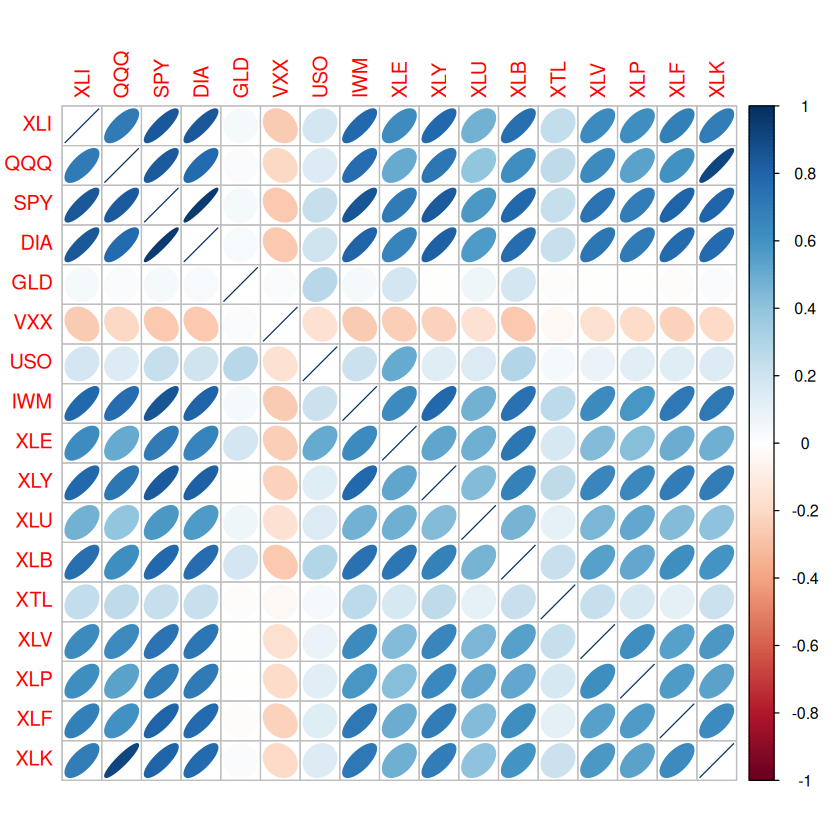

In [115]:
# Correlation between ETFS (they are too many for a correlation matrix)

etfs <- sp500_px[row.names(sp500_px) > '2012-07-01', sp500_sym[sp500_sym$sector == 'etf', 'symbol']]
library(corrplot)
corrplot(cor(etfs), method='ellipse')

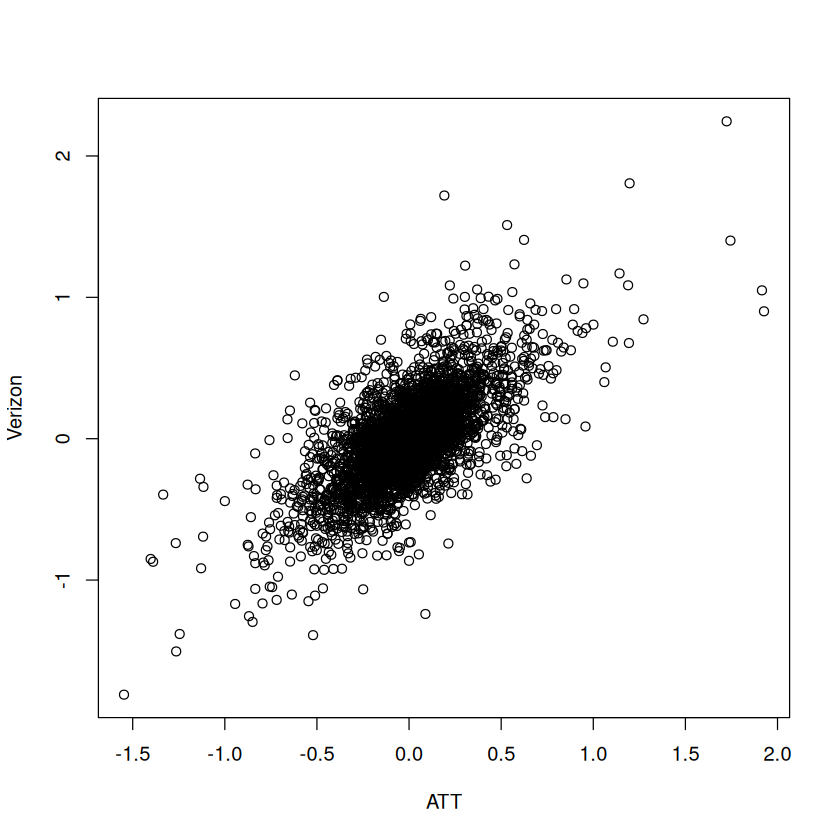

In [121]:
# Scatter plot of correlation between ATT and Verizon
plot(telecom$T, telecom$VZ, xlab='ATT', ylab='Verizon')

### Two or more variables

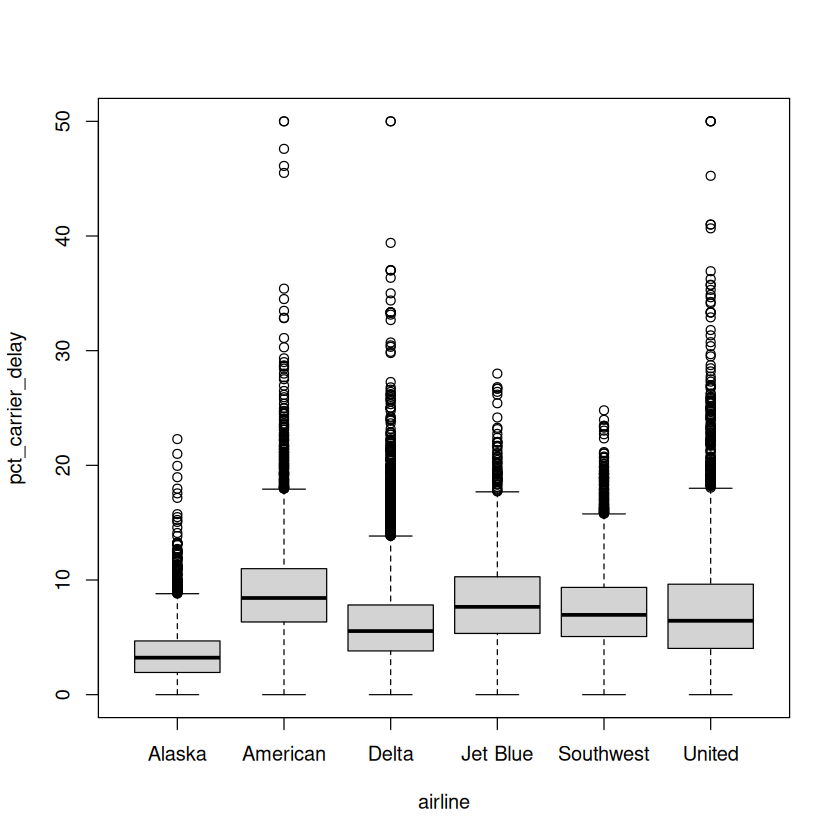

In [128]:
airline_stats <- read.csv('data/airline_stats.csv')

boxplot(pct_carrier_delay ~ airline, data=airline_stats, ylim=c(0, 50))



Warning message:
“Removed 38 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


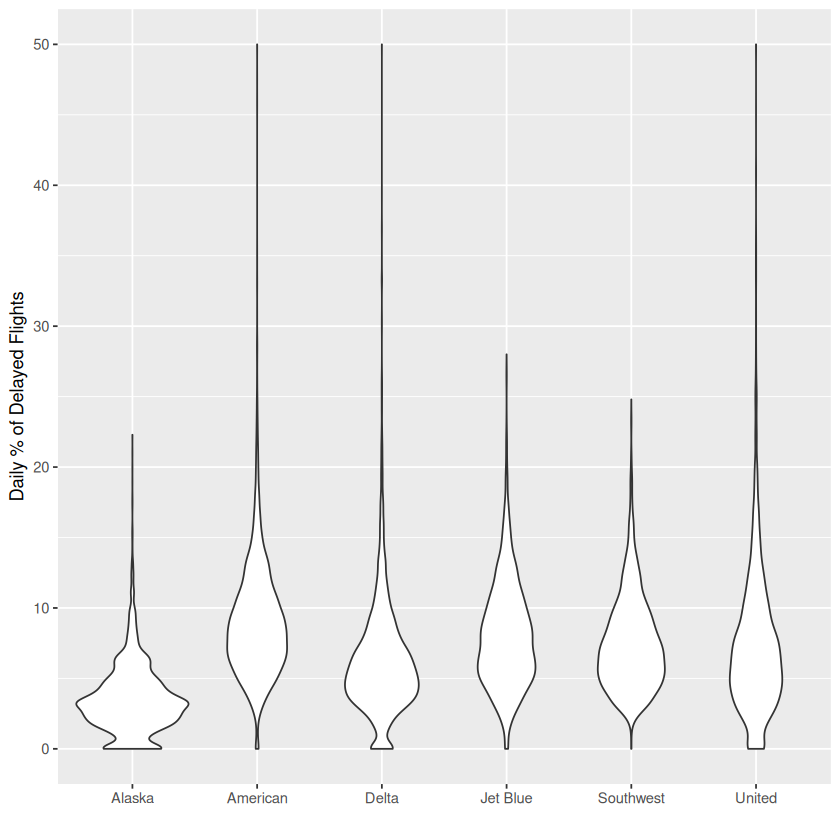

In [132]:
library(ggplot2)
ggplot(data=airline_stats, aes(airline, pct_carrier_delay)) +
 ylim(0, 50) +
 geom_violin() +
 labs(x='', y='Daily % of Delayed Flights')
